<a href="https://colab.research.google.com/github/niteshgupta2711/Python_assignments/blob/main/predict_the_sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from tfx.components import CsvExampleGen

In [ ]:
# !pip install tfx

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [47]:
seq_=np.linspace(0,10000,10000)

In [48]:
df=pd.DataFrame(seq_.reshape(-1,5))

In [49]:
df.head()

,0,1,2,3,4
0,0.0000,1.0001,2.0002,3.0003,4.0004
1,5.0005,6.0006,7.0007,8.0008,9.0009
2,10.0010,11.0011,12.0012,13.0013,14.0014
3,15.0015,16.0016,17.0017,18.0018,19.0019
4,20.0020,21.0021,22.0022,23.0023,24.0024


In [99]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(4,)),
                           tf.keras.layers.Dense(16,activation='relu'),
                           tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)])

In [100]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                80        
                                                                 
 dense_37 (Dense)            (None, 1)                 17        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),loss=tf.keras.losses.MeanSquaredError(),metrics=['mse'])

In [103]:
history=model.fit(df.iloc[:9000,:4].values,df.iloc[:9000,[4]].values,batch_size=32,epochs=200)

Epoch 1/200
63/63 [==============================] - 0s 2ms/step - loss: 0.6804 - mse: 0.6804
Epoch 2/200
63/63 [==============================] - 0s 2ms/step - loss: 3.4304 - mse: 3.4304
Epoch 3/200
63/63 [==============================] - 0s 2ms/step - loss: 2.0884 - mse: 2.0884
Epoch 4/200
63/63 [==============================] - 0s 2ms/step - loss: 1.9621 - mse: 1.9621
Epoch 5/200
63/63 [==============================] - 0s 2ms/step - loss: 0.6958 - mse: 0.6958
Epoch 6/200
63/63 [==============================] - 0s 2ms/step - loss: 2.7951 - mse: 2.7951
Epoch 7/200
63/63 [==============================] - 0s 2ms/step - loss: 15.7953 - mse: 15.7953
Epoch 8/200
63/63 [==============================] - 0s 2ms/step - loss: 0.9367 - mse: 0.9367
Epoch 9/200
63/63 [==============================] - 0s 2ms/step - loss: 1.1912 - mse: 1.1912
Epoch 10/200
63/63 [==============================] - 0s 2ms/step - loss: 3.3772 - mse: 3.3772
Epoch 11/200
63/63 [==============================] - 0s 

In [104]:
model.predict(np.array([[56,57,58,59]]))

array([[59.955727]], dtype=float32)

In [64]:
df.iloc[:9000,[4]]

,4
0,4.0004
1,9.0009
2,14.0014
3,19.0019
4,24.0024
...,...
1995,9979.9980
1996,9984.9985
1997,9989.9990
1998,9994.9995


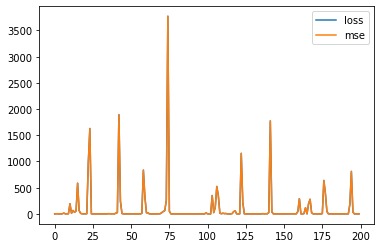

In [106]:
pd.DataFrame(history.history).plot()